# Action Potential Tutorial

HBox(children=(Button(description=u'Block Na Channel', style=ButtonStyle()), Button(description=u'Unblock Na Channel', style=ButtonStyle()), Text(value=u'Na Active', layout=Layout(width=u'100px'))))

HBox(children=(Button(description=u'Block K Channel', style=ButtonStyle()), Button(description=u'Unblock K Channel', style=ButtonStyle()), Text(value=u'K Active', layout=Layout(width=u'100px'))))

HBox(children=(Button(description=u'Toggle IClamp/VClamp', style=ButtonStyle()), Button(description=u'Reset to Initial Values', style=ButtonStyle())))

Box(children=(Box(children=(Label(value=u'------------------------------------------------------------', layout=Layout(height=u'18px', width=u'100%')),)), Box(children=(Label(value=u'Currently Active', layout=Layout(width=u'12%')), Text(value=u'Current Clamp', layout=Layout(width=u'105px')))), Box(children=(Label(value=u'-------------------------------------------------', layout=Layout(height=u'18px', width=u'28%')), Label(value=u'-------------------------------------------------', layout=Layout(height=u'18px', width=u'27%')))), Box(children=(Label(value=u'Current Clamp Settings', layout=Layout(width=u'28%')), Label(value=u'Voltage Clamp Settings', layout=Layout(width=u'27%')))), Box(children=(Label(value=u'-------------------------------------------------', layout=Layout(height=u'18px', width=u'27%')), Label(value=u'-------------------------------------------------', layout=Layout(height=u'18px', width=u'27%')))), Box(children=(Label(value=u'Amplitude (nA)', layout=Layout(width=u'12%')), FloatText(value=100.0, layout=Layout(width=u'100px')), Label(value=u' ', layout=Layout(width=u'3%')), Label(value=u'Amplitude (mV)', layout=Layout(height=u'20px', width=u'12%')), FloatText(value=-10.0, layout=Layout(width=u'100px')))), Box(children=(Label(value=u'Duration (ms)', layout=Layout(width=u'12%')), FloatText(value=40.0, layout=Layout(width=u'100px')))), Box(children=(Label(value=u'Delay (ms)', layout=Layout(width=u'12%')), FloatText(value=5.0, layout=Layout(width=u'100px'))))), layout=Layout(align_items=u'initial', display=u'flex', flex_flow=u'column', width=u'80%'))

HBox(children=(Button(button_style=u'info', description=u'Run Model', style=ButtonStyle()), Button(button_style=u'warning', description=u'Clear Output', style=ButtonStyle())))

Simulation Complete. Values used for cur_amp: 100.0, cur_dur: 40.0, and cur_del: 5.0


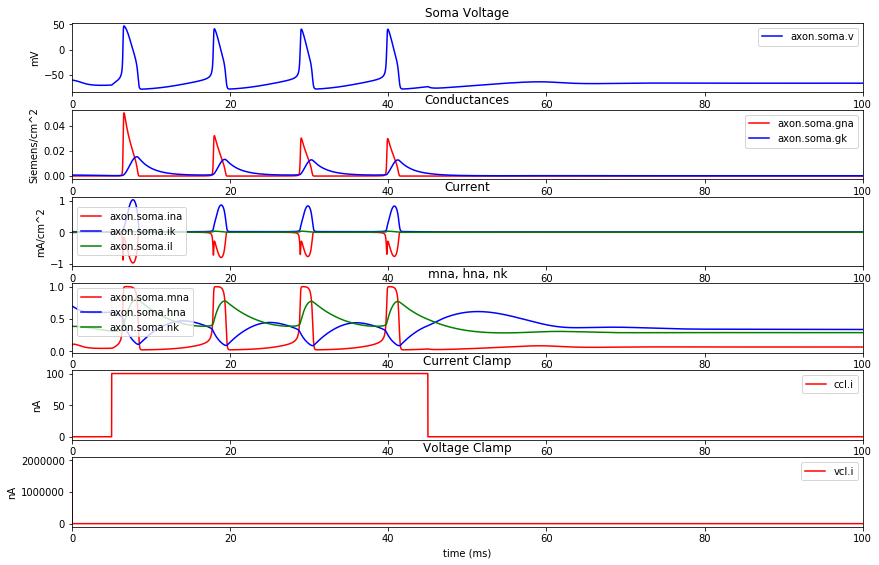

In [1]:
# Import necessary libraries
%matplotlib qt5
from IPython.display import display, clear_output
from ipywidgets import Layout, Button, Box, FloatText, Textarea, Dropdown, Label, IntSlider, Text, VBox, HBox
import matplotlib.pyplot as plt
%matplotlib nbagg
import AP_Main

toggle_flag=0

# Create input text boxes and buttons for users
cur_amp = FloatText(value=100, layout=Layout(width='100px'))
cur_dur = FloatText(value=40, layout=Layout(width='100px'))
cur_del = FloatText(value=5, layout=Layout(width='100px'))
voltage = FloatText(value=-10, layout=Layout(width='100px'))
active_clamp = Text(value='Current Clamp', layout=Layout(width='105px'))
na_active = Text(value='Na Active', layout=Layout(width='100px'))
k_active = Text(value='K Active', layout=Layout(width='100px'))

block_na = Button(description="Block Na Channel")
unblock_na = Button(description="Unblock Na Channel")
block_k = Button(description="Block K Channel")
unblock_k = Button(description="Unblock K Channel")
toggle_iv = Button(description="Toggle IClamp/VClamp")
init_reset = Button(description="Reset to Initial Values")
run_button = Button(description="Run Model", button_style='info')
clear_button = Button(description="Clear Output", button_style='warning')

# Use a form to hold the Labels and Input Boxes 
form_items = [
    Box([Label(value='------------------------------------------------------------', layout=Layout(width='100%',height='18px'))]),
    Box([Label(value='Currently Active', layout=Layout(width='12%')), active_clamp]),
    Box([Label(value='-------------------------------------------------', layout=Layout(width='28%',height='18px')),Label(value='-------------------------------------------------', layout=Layout(width='27%',height='18px'))]),
    Box([Label(value='Current Clamp Settings', layout=Layout(width='28%')), Label(value='Voltage Clamp Settings', layout=Layout(width='27%'))]),
    Box([Label(value='-------------------------------------------------', layout=Layout(width='27%',height='18px')),Label(value='-------------------------------------------------', layout=Layout(width='27%',height='18px'))]),
    Box([Label(value='Amplitude (nA)', layout=Layout(width='12%')), cur_amp, Label(value=' ', layout=Layout(width='3%')), Label(value='Amplitude (mV)', layout=Layout(width='12%', height='20px')), voltage]),
    Box([Label(value='Duration (ms)', layout=Layout(width='12%')), cur_dur]),
    Box([Label(value='Delay (ms)', layout=Layout(width='12%')), cur_del]),
]

# Define the parameters of the form_items
form = Box(form_items,layout=Layout(
    display='flex',
    flex_flow='column',
    align_items='initial',
    width='80%'
))

# Display all buttons and form
display(HBox([block_na, unblock_na, na_active]), HBox([block_k, unblock_k, k_active]), HBox([toggle_iv, init_reset]), form, HBox([run_button, clear_button]))

# Define functions that run when the user clicks a button
def run_clicked(b):
    if toggle_flag == 0:
        print "Simulation Complete. Values used for cur_amp: {0}, cur_dur: {1}, and cur_del: {2}".format(cur_amp.value, cur_dur.value, cur_del.value)
    else:
        print "Simulation Complete. Values used for voltage was: {0}".format(voltage.value)
    AP_Main.edit_config(cur_amp.value, cur_dur.value, cur_del.value, voltage.value, toggle_flag)
    AP_Main.run_simulation()

def clear_clicked(b):
    plt.clf()
    
def init_reset_clicked(b):
    cur_amp.value = 100
    cur_dur.value = 40
    cur_del.value = 5
    voltage.value = -10
    AP_Main.init_val_reset()

def blk_na_clicked(b):
    na_active.value = 'Na Blocked'
    AP_Main.block_na_channel()

def unblk_na_clicked(b):
    na_active.value = 'Na Active'
    AP_Main.unblock_na_channel()

def blk_k_clicked(b):
    k_active.value = 'K Blocked'
    AP_Main.block_k_channel()

def unblk_k_clicked(b):
    k_active.value = 'K Active'
    AP_Main.unblock_k_channel()

def toggle_iv_clicked(b):
    global toggle_flag
    if toggle_flag == 0:
        active_clamp.value = 'Voltage Clamp'
        toggle_flag = 1
    else:
        active_clamp.value = 'Current Clamp'
        toggle_flag = 0
    
block_na.on_click(blk_na_clicked)
unblock_na.on_click(unblk_na_clicked)
block_k.on_click(blk_k_clicked)
unblock_k.on_click(unblk_k_clicked)
toggle_iv.on_click(toggle_iv_clicked)
init_reset.on_click(init_reset_clicked)
run_button.on_click(run_clicked)
clear_button.on_click(clear_clicked)